In [2]:
import pandas as pd

# Load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# Clean the data 
def clean_data(df):
    print("Column Names:")
    print(df.columns)

    # Handle missing values
    df.dropna(inplace=True)

    # Remove the duplicates
    df.drop_duplicates(inplace=True)

 
    if 'Rating' in df.columns:
        df['Rating'] = df['Rating'].astype(float)

    if 'Reviews' in df.columns:
        df['Reviews'] = df['Reviews'].astype(int)

    if 'Installs' in df.columns:
        df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '')))

    return df


file_path = r'C:\Users\Administrator\Downloads\playstore_dataset.csv'


play_store_data = load_data(file_path)


print("Before Cleaning:") # displaying data before cleaning
print(play_store_data.info())

# Clean the data
play_store_data = clean_data(play_store_data)

print("\nAfter Cleaning:") # display data after cleaning
print(play_store_data.info())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10244\3466588450.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43229 entries, 0 to 43228
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                43229 non-null  int64  
 1   genre             43229 non-null  object 
 2   app_name          43229 non-null  object 
 3   rating            43229 non-null  float64
 4   reviews           43229 non-null  int64  
 5   cost_label        43226 non-null  object 
 6   rate_5_pc         43229 non-null  float64
 7   rate_4_pc         43229 non-null  float64
 8   rate_3_pc         43229 non-null  float64
 9   rate_2_pc         43229 non-null  float64
 10  rate_1_pc         43229 non-null  float64
 11  updated           43229 non-null  object 
 12  size_mb           43229 non-null  float64
 13  installs          43229 non-null  int64  
 14  current_version   43222 non-null  object 
 15  requires_android  43207 non-null  object 
 16  content_rating    43229

In [3]:
import pandas as pd

# Function to display the leading company in a specific genre based on installs and average ratings
def leading_company_in_genre(df, target_genre):
    # using specific genre filter the data
    genre_data = df[df['genre'] == target_genre]

    # finding out the company with max installs
    leading_company = genre_data.loc[genre_data['installs'].idxmax()]['offered_by']

    # Calculate the average rating for apps offered by the leading company
    avg_rating = genre_data[genre_data['offered_by'] == leading_company]['rating'].mean()

    return genre, leading_company, avg_rating

# Get the unique types of the dataset.
unique_genres = play_store_data['genre'].unique()

# Make a list for storing the results.
result_table = []

# Add genres, top firms, and average ratings to the result table.
for genre in unique_genres:
    genre, leading_company, avg_rating = leading_company_in_genre(play_store_data, genre)
    result_table.append([genre, leading_company, avg_rating])

# From the result_table, create a DataFrame.
result_df = pd.DataFrame(result_table, columns=['Genre', 'Leading Company', 'Average Rating'])

# Arrange the DataFrame in decreasing order according to average ratings.
result_df = result_df.sort_values(by='Average Rating', ascending=False).reset_index(drop=True)

#display the result
result_df


,Genre,Leading Company,Average Rating
0,Medical,SimpleInnovation,4.700000
1,Art & Design,Canva,4.700000
2,Education,Duolingo,4.700000
3,Auto & Vehicles,DevPlank,4.700000
4,Lifestyle,Pinterest,4.600000
5,Events,Greetings Island,4.600000
6,Shopping,Alibaba Mobile,4.550000
7,Photography,Google LLC,4.550000
8,Adventure,Pretty Simple,4.540000
9,Card,MobilityWare,4.530769


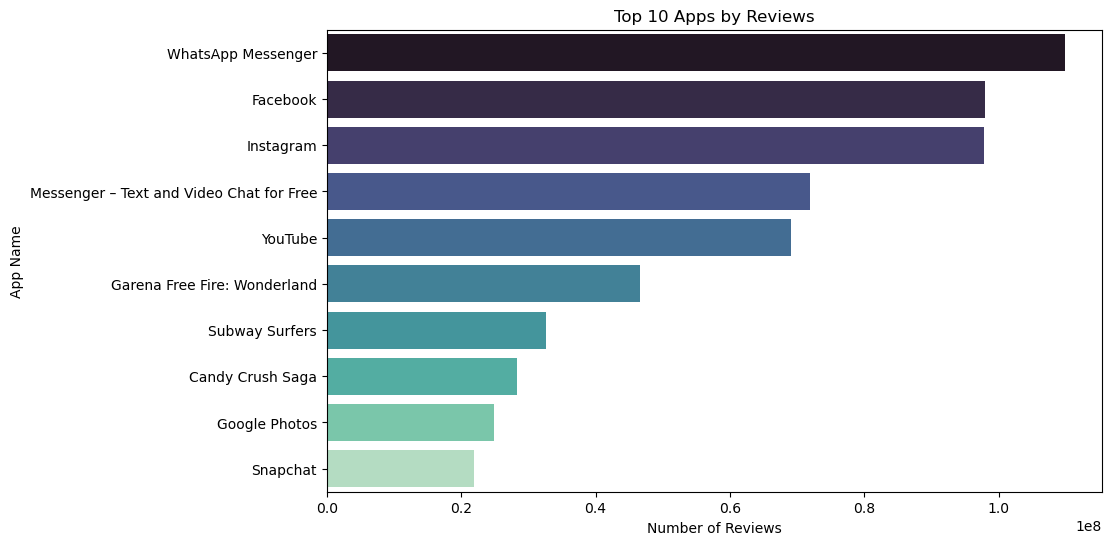

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that the column name in your dataset is reviews.
top_reviews_apps = play_store_data.nlargest(10, 'reviews')

# Establish the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews', y='app_name', data=top_reviews_apps, palette='mako')
plt.xlabel('Number of Reviews')
plt.ylabel('App Name')
plt.title('Top 10 Apps by Reviews')
plt.show()

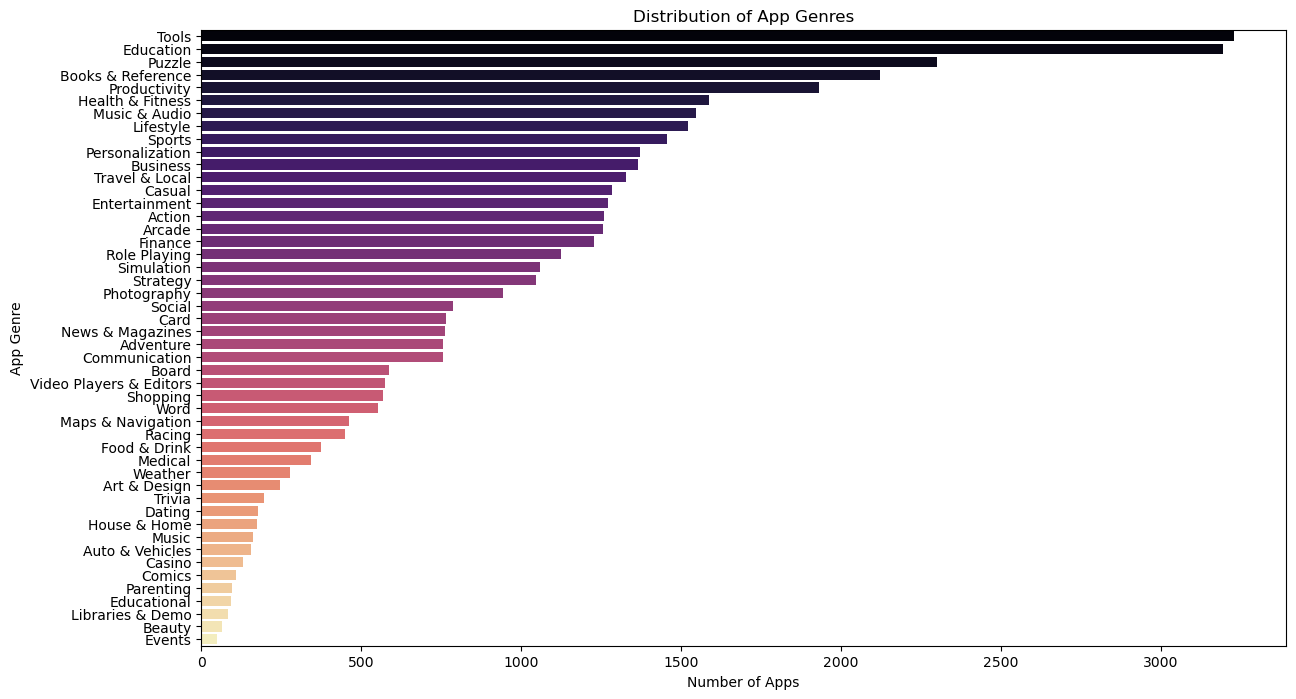

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Visualising the app genre distribution
plt.figure(figsize=(14, 8))
sns.countplot(y='genre', data=play_store_data, order=play_store_data['genre'].value_counts().index, palette='magma')
plt.title('Distribution of App Genres')
plt.xlabel('Number of Apps')
plt.ylabel('App Genre')
plt.show()




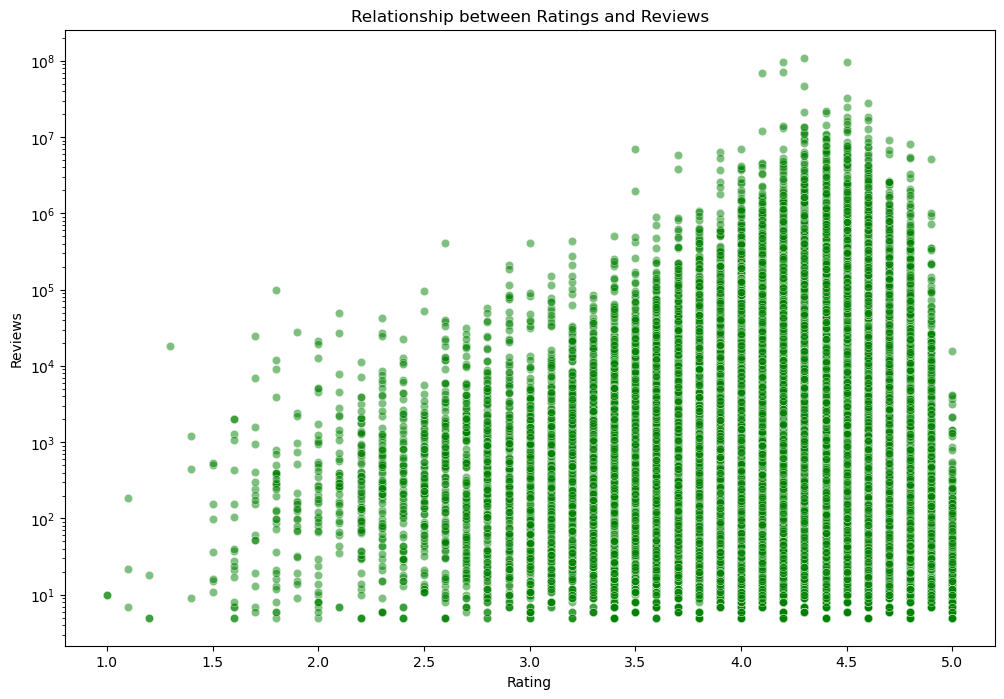

In [19]:
# For improved visualisation, set the y- and x-axes to logarithmic and linear scales, respectively.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='rating', y='reviews', data=play_store_data, alpha=0.5, color='green')
plt.title('Relationship between Ratings and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.xscale('linear') 
plt.yscale('log')
plt.show()



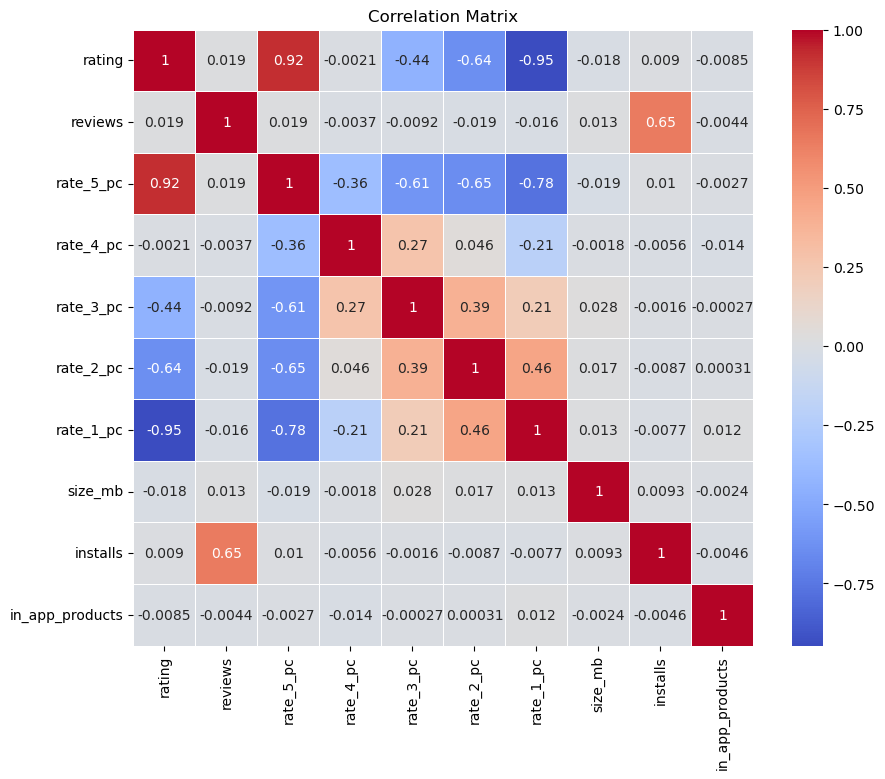

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


# Remove from the DataFrame the designated columns.
columns_to_drop = ['id']
filtered_play_store_data = play_store_data.drop(columns=columns_to_drop)

# Visualization of the correlation matrix
correlation_matrix = filtered_play_store_data.corr(numeric_only=True)

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


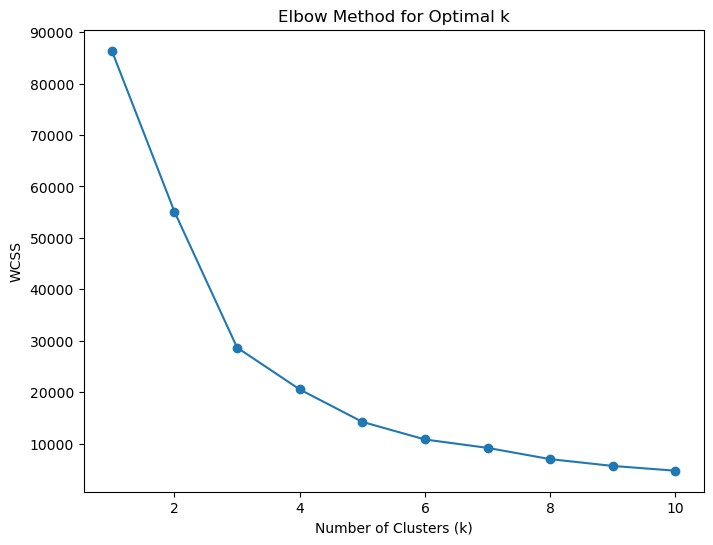

User Counts in Each Cluster:
0    34524
1     8667
2        6
Name: cluster, dtype: int64


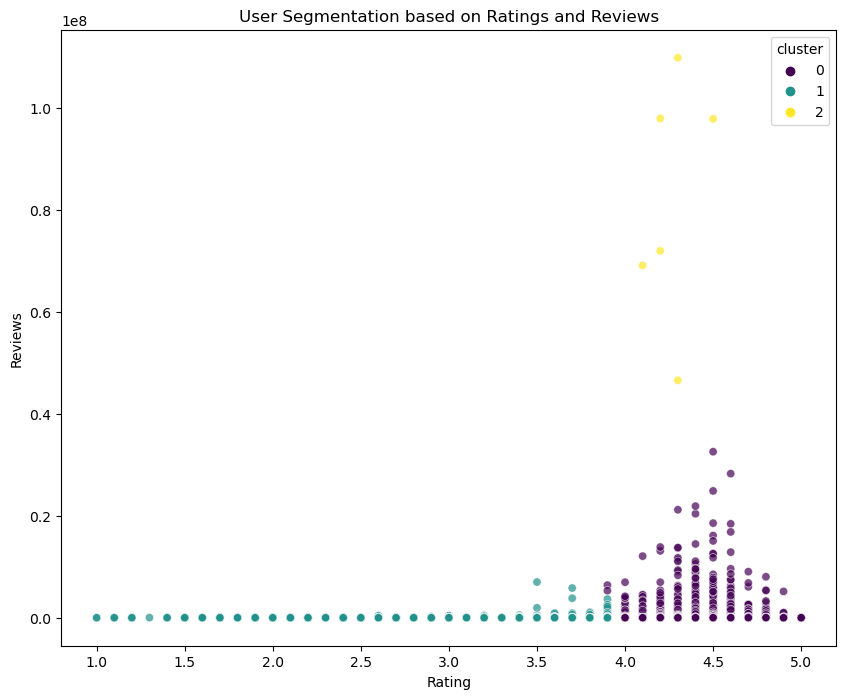

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


features_for_clustering = ['rating', 'reviews']


user_data_for_clustering = play_store_data[features_for_clustering]

# Make the data standardised
scaler = StandardScaler()
scaled_user_data = scaler.fit_transform(user_data_for_clustering)

# Using the Elbow Method, determine the ideal number of clusters.
wcss = []  # Sum of Squares inside a Cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_user_data)
    wcss.append(kmeans.inertia_)

# Create an Elbow Method graph.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Determine the appropriate number of clusters using the Elbow Method.
optimal_k = 3  # Modify depending on the Elbow Method graph.

# Use K-means clustering with the optimal number of clusters.
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
play_store_data['cluster'] = kmeans.fit_predict(scaled_user_data)

# Show the number of users in each cluster.
print("User Counts in Each Cluster:")
print(play_store_data['cluster'].value_counts())

# Display the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='rating', y='reviews', data=play_store_data, hue='cluster', palette='viridis', alpha=0.7)
plt.title('User Segmentation based on Ratings and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()


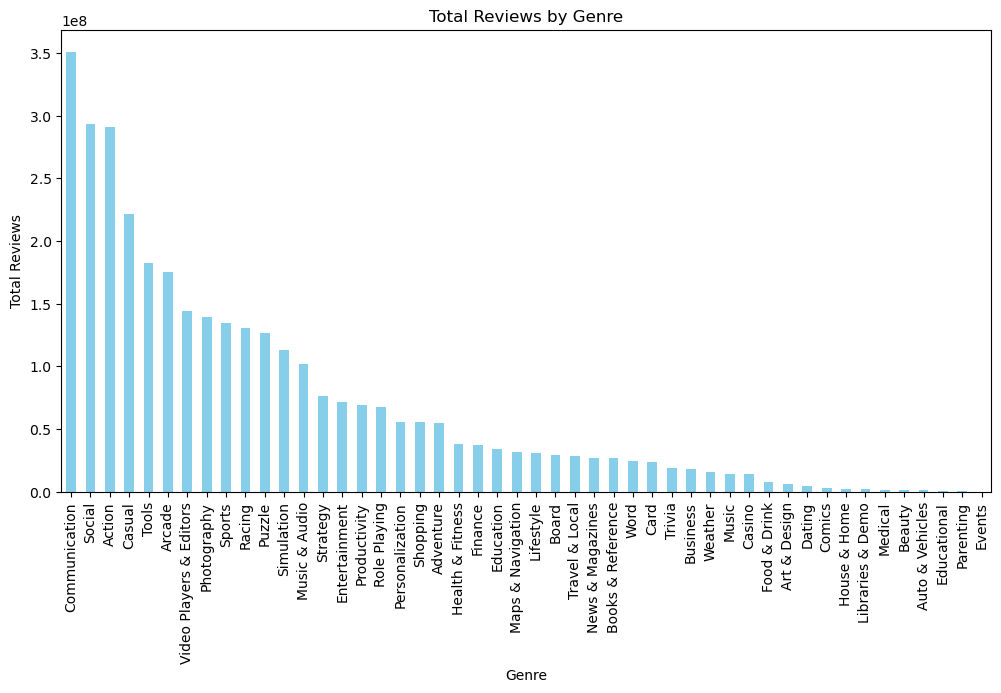

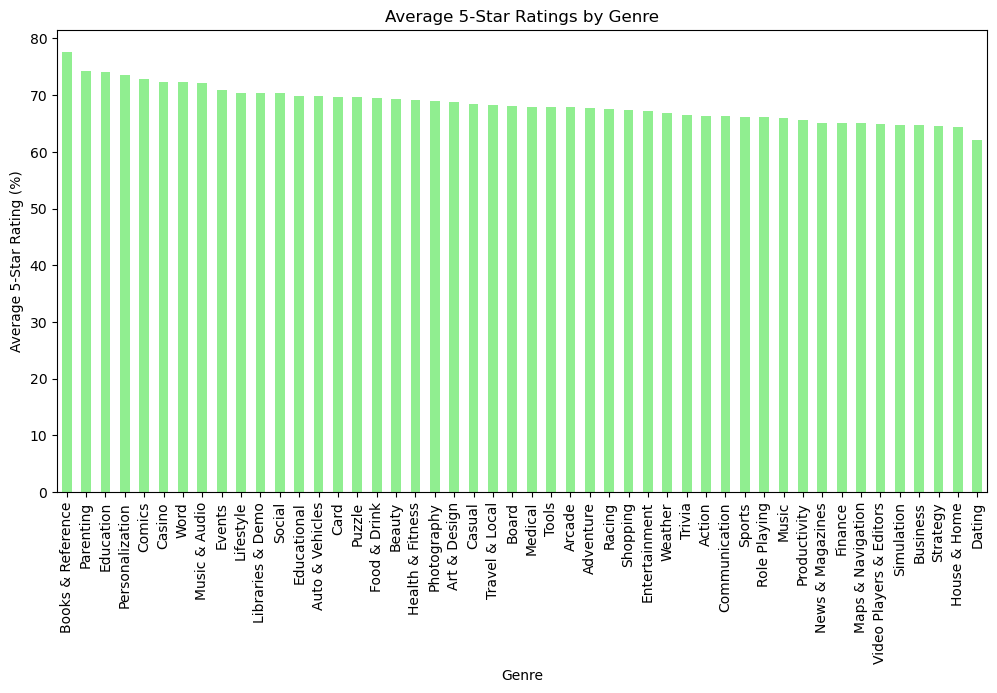

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


reviews_column = 'reviews'
genre_column = 'genre'

# Examine trends in how many reviews each genre has received.
reviews_by_genre = play_store_data.groupby(genre_column)[reviews_column].sum().sort_values(ascending=False)
reviews_by_genre.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Reviews')
plt.show()

rate_5_column = 'rate_5_pc'

# Examining trends in the percentage of 5-star reviews by genre
rate_5_by_genre = play_store_data.groupby(genre_column)[rate_5_column].mean().sort_values(ascending=False)
rate_5_by_genre.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Average 5-Star Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average 5-Star Rating (%)')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16404\2958307962.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('playstore_dataset.csv')


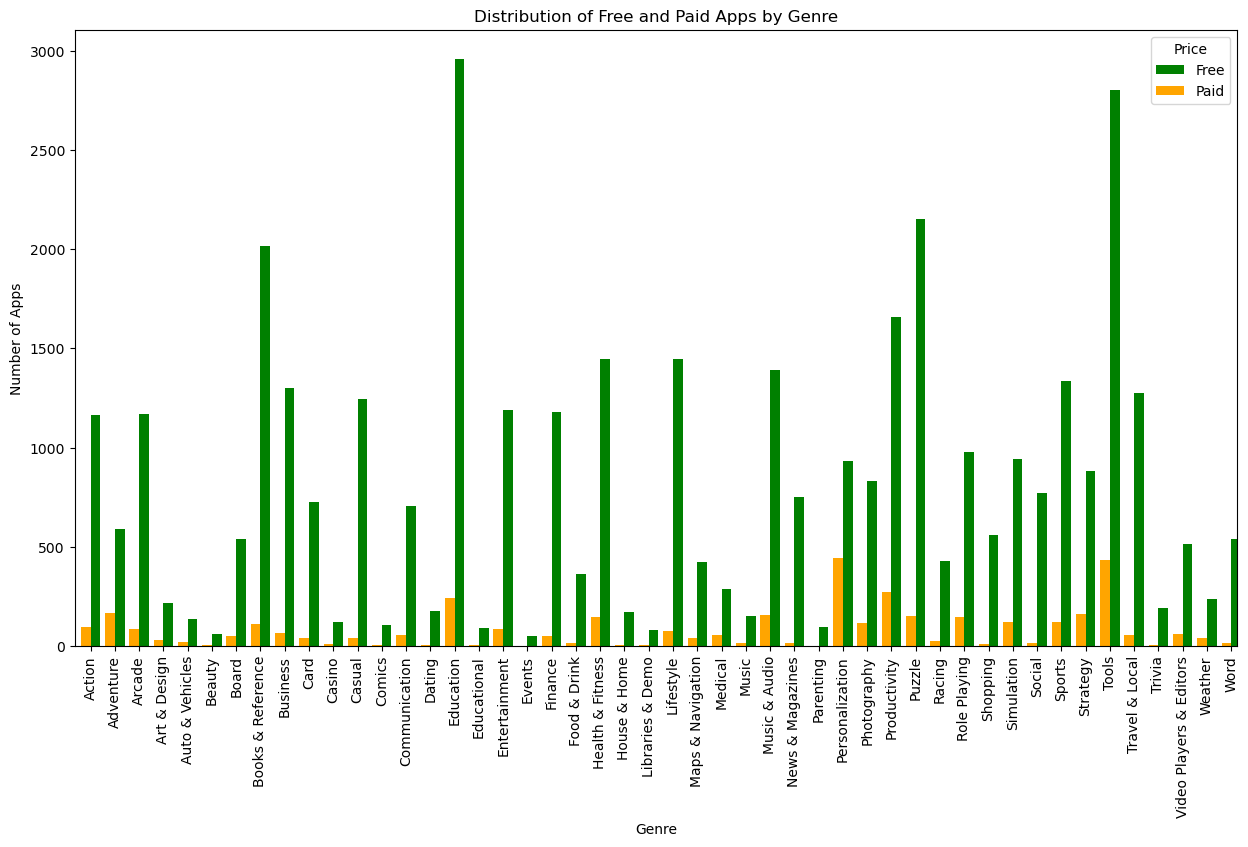

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('playstore_dataset.csv')


# A function for displaying the distribution of free and premium applications across all categories.
def plot_apps_distribution(dataset):
   #In a new column named "is_free," set the value of "Free" to 1 and all other values to 0.
    dataset['is_free'] = (dataset['cost_label'] == 'Free').astype(int)

    # Determine the number of free and premium applications in each genre.
    genre_counts = dataset.groupby(['genre', 'is_free']).size().unstack().fillna(0)

    # Making a plot for Free Apps
    if 1 in genre_counts.columns:
        genre_counts[1].plot(kind='bar', figsize=(15, 8), color='green', position=0, width=0.4, label='Free')

    # Making a plot for paid Apps
    if 0 in genre_counts.columns:
        genre_counts[0].plot(kind='bar', figsize=(15, 8), color='orange', position=1, width=0.4, label='Paid')

    plt.title('Distribution of Free and Paid Apps by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Number of Apps')
    plt.legend(title='Price', labels=['Free', 'Paid'])
    plt.show()

plot_apps_distribution(dataset)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np
import pandas as pd

# Load dataset
dataset = play_store_data

# Define target variable
target = 'rating'

# Select features, excluding 'id', 'app_name', and 'rating'
features = ['genre', 'reviews', 'size_mb', 'installs', 'rate_5_pc']

# Function to map genres to numerical categories
def map_genres(dataset):
    unique_genres = dataset['genre'].unique()
    return {genre: index for index, genre in enumerate(unique_genres)}

# Apply genre mapping
genre_mapping = map_genres(dataset)
dataset['genre_mapped'] = dataset['genre'].map(genre_mapping)

# Create feature matrix (X) and target variable (y)
X = dataset[['genre_mapped', 'reviews', 'size_mb', 'installs', 'rate_5_pc']]
y = dataset[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    evaluation_metrics = {
        'Training Score': model.score(X_train, y_train),
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

    return evaluation_metrics

# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
metrics = train_and_evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# Display model performance metrics
for metric, value in metrics.items():
    print(f'{metric}: {value}')

Training Score: 0.8986599144478709
R2 Score: 0.8869380977935986
MAE: 0.11592039295716021
MSE: 0.0252222607765491
RMSE: 0.1588151780421163


In [7]:
# taking input from user
user_input = {
    'genre': input("Enter the genre: "),
    'reviews': int(input("Enter the number of reviews: ")),
    'size_mb': float(input("Enter the size (in MB): ")),
    'installs': int(input("Enter the number installs: ")),
    'rate_5_pc': int(input("Enter the number of 5 star ratings: "))
}

user_data = pd.DataFrame(user_input, index=[0])
# Use the previously defined 'mapping' to convert the 'genre' input to a number value.
user_data['genre'] = user_data['genre'].map(mapping)

print(user_data)

# Using the trained model, predict the rating of the user input.
predicted_rating = model.predict(user_data)
print(f'Predicted Rating: {predicted_rating[0]}')


Enter the genre: Action
Enter the number of reviews: 4057455
Enter the size (in MB): 40
Enter the number installs: 100000054
Enter the number of 5 star ratings: 3246044
   genre  reviews  size_mb   installs  rate_5_pc
0      0  4057455     40.0  100000054    3246044
Predicted Rating: 4.907523264637893
